In [2]:
import numpy as np
import wave as wv
#import librosa

def inv_conv_old(a):
    res = []
    for i in range(len(a)):
        res.append(np.dot(a[i:], np.roll(a,i)[i:]))
    print("converting array")
    return np.array(res)

def inv_conv(a):
    return np.convolve(a, np.flip(a, 0))[-len(a):]

def runmean(a, width):
    res = []
    amod = np.concatenate((np.full(width, np.mean(a[:width])), a, np.full(width, np.mean(a[-width:]))))
    for i in range(len(a)):
        res.append(np.mean(amod[i : i + 2 * width]))
    return np.array(res)
import matplotlib.pyplot as plt 

def getpeaks(a):
    return

def loadwav(filename):
    # Read file to get buffer                                                                                               
    ifile = wv.open(filename)
    samples = ifile.getnframes()
    audio = ifile.readframes(samples)

    # Convert buffer to float32 using NumPy                                                                                 
    audio_as_np_int16 = np.frombuffer(audio, dtype=np.int16)
    audio_as_np_float32 = audio_as_np_int16.astype(np.float32)

    # Normalise float32 array so that values are between -1.0 and +1.0                                                      
    max_int16 = 2**15
    audio_normalised = audio_as_np_float32 / max_int16
    return audio_normalised

def loadosccsv(filename):
    lines = open(filename, "r").readlines()[2:]
    time = []
    sig = []
    for l in lines:
        parts = l.split(',')
        time.append(float(parts[0]))
        sig.append(float(parts[1]))
    return np.array(time), np.array(sig)

noisify = lambda a, dev: a + np.random.normal(0, dev, len(a))

waveshift = lambda a, shift: np.concatenate((np.zeros(shift), a[:-shift]))


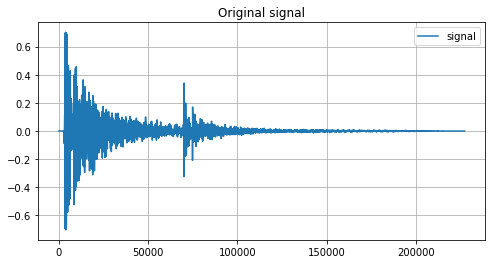

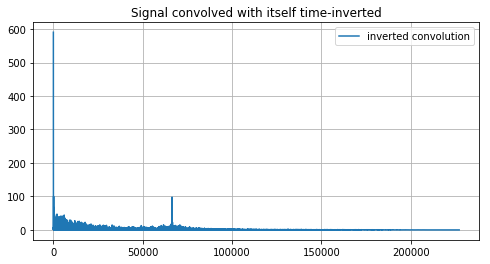

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RankWarning: Polyfit may be poorly conditioned


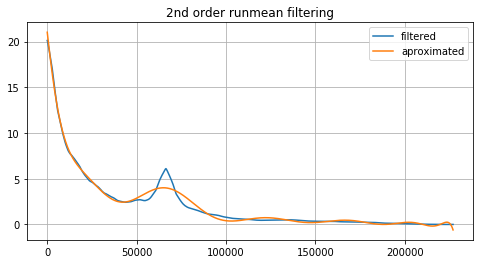

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RankWarning: Polyfit may be poorly conditioned


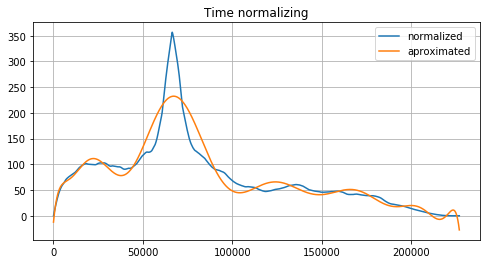

polynome [-4.51645545e-26  5.58696142e-23 -2.87099563e-20  7.44978067e-18
 -7.57395849e-16 -1.14689702e-13  5.30098798e-11 -9.06959042e-09
  9.22571512e-07 -6.03035785e-05  2.54298102e-03 -6.70552918e-02
  1.04388588e+00 -8.90982944e+00  4.06265424e+01 -1.22621749e+01]
all roots [-180.2560178 +0.j          196.92633785+0.j
  190.28433876+0.j          176.26600861+0.j
  169.21068541+0.j          146.19448369+0.j
  131.01339232+0.j          109.34621921+0.j
   91.80644744+0.j           59.2253195 +0.j
   33.30327314+0.j           19.65687133+0.j
    5.78894319+2.53333571j    5.78894319-2.53333571j]
real roots [-1802.560178    1969.2633785   1902.84338757  1762.66008605
  1692.1068541   1461.94483693  1310.13392315  1093.46219212
   918.06447441   592.25319503   333.03273141   196.56871333]


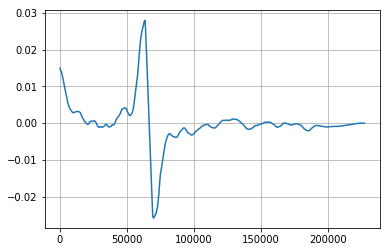

In [3]:
import matplotlib.pyplot as plt 
import numpy as np

grid = np.linspace(0, 200, 2000)
wave = np.sin(grid)*np.exp(-grid / 10)



#s = wave - waveshift(wave, 700)/50 
#grid, s = loadosccsv("test.csv")
s = loadwav("echo1.wav")
grid = np.linspace(0, 200, s.shape[0])


fwidth = int(len(s) / 80)
#s = noisify(s, 0.015)
#s = s * 3
#s = np.clip(s, -0.06, 0.06)

myfigsize = (8, 4)

plt.figure(figsize = myfigsize)
plt.title("Original signal")
plt.plot(s, label = "signal")
plt.legend()
plt.grid()
plt.show()

l = input()
while l != "":
    exec(l)
    l = input()

plt.figure(figsize = myfigsize)
plt.title("Signal convolved with itself time-inverted")
aconv = np.abs(inv_conv(s))                     
plt.plot(aconv, label = "inverted convolution")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = myfigsize)
plt.title("2nd order runmean filtering")
filtered = runmean(runmean(aconv, fwidth), fwidth) 
#filtered = runmean(aconv, 50)
plt.plot(filtered, label = "filtered")
poly = np.polyfit(grid, filtered, 15)
polyapp = np.polyval(poly, grid)
plt.plot(polyapp, label = "aproximated")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = myfigsize)
plt.title("Time normalizing")
timenorm = filtered * grid
poly = np.polyfit(grid, timenorm, 15)
p1d = np.polyder(poly, 1)
roots = np.roots(p1d)
rroots = []
for c in roots:
    if np.imag(c)==0:
        rroots.append(np.real(c))
rroots = np.array(rroots)

polyapp = np.polyval(poly, grid)
plt.plot(timenorm, label = "normalized")
plt.plot(polyapp, label = "aproximated")
#plt.plot(rroots * 10, np.polyval(poly, rroots), "r+")
plt.legend()
plt.grid()
plt.show()

print("polynome", poly)
print("all roots", roots)
print("real roots", rroots * 10)

gradient = runmean(np.gradient(timenorm), fwidth)
#gradient = np.gradient(timenorm)
plt.plot(gradient)
plt.grid()
plt.show()

